<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C3/C3.html"><img src="../data/C3_nav.png" width="100"  style="float:right;" alt="C3"></a>
<h1> Dynamic Time Warping (DTW)</h1> 
</div>

<br/>

<p>
Following Section 3.2.1 of <a href="http://www.music-processing.de">[Müller, FMP, Springer 2015]</a>, we explain in this notebook the basic algorithm for dynamic time warping (DTW). A general introduction can also be found in the following book chapter.

<ul>    
<li><span style="color:black">
Meinard Müller:  <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller/publications/2007_Mueller_DTW-Chapter04-IR_Springer.pdf"><strong>Dynamic Time Warping (Chapter 4 of Information Retrieval for Music and Motion).</strong></a> Springer Verlag, ISBN: 3540740473, 2007. 
<br>
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_Mueller07_InformationRetrieval_SPRINGER.txt"> Bibtex </a>
</span></li>
  
</ul>   

</p> 

## Basic Idea

Given two sequences $X:=(x_1,x_2,\ldots,x_N)$ of length $N\in\mathbb{N}$ and $Y:=(y_1,y_2,\ldots,y_M)$ of length $M\in\mathbb{N}$, the objective of **dynamic time warping** (DTW) is to temporally align these two sequences in some optimal sense under certain constraints. The sequences may be discrete signals, feature sequences, sequences of characters, or any kind of time series. Often the indices of the sequences correspond to successive points in time that are spaced at uniform time intervals. The following figure illustrates an alignment (indicated by the red bidirectional arrows) between a sequence $X$ of length $N=9$ and a sequence $Y$ of length $M=7$.

<img src="../data/C3/FMP_C3_F12.png" width="500px" align="middle" alt="C0">

Each of the red bidirectional arrows encodes a correspondence between two elements $x_n$ and $y_m$ for $n\in[1:N]$ and $m\in[1:M]$. Such a local correspondence can be modeled by the index pair $(n,m)$. The right side of the above figure illustrates how the alignment shown on the left is encoded by a sequence of index pairs. 

## Warping Path

To model a global alignment between the elements of the sequences $X$ and $Y$, the idea is to consider a sequence of index pairs that fulfills certain constraints. This leads to the notion of a **warping path**. By definition, an $(N,M)$-warping path of length $L\in\mathbb{N}$ is a sequence 

\begin{equation}
P=(p_1,\ldots,p_L)
\end{equation}

with $p_\ell=(n_\ell,m_\ell)\in[1:N]\times [1:M]$ for $\ell\in[1:L]$ satisfying the following conditions:

* Boundary condition: $p_1= (1,1)$ and $p_L=(N,M)$
* Monotonicity condition:  $n_1\leq n_2\leq\ldots \leq n_L$ and $m_1\leq m_2\leq \ldots \leq m_L$
* Step-size condition: $p_{\ell+1}-p_\ell\in \Sigma:=\{(1,0),(0,1),(1,1)\}$ for $\ell\in[1:L]$

An $(N,M)$-warping path $P=(p_1,\ldots,p_L)$ defines an alignment between two sequences $X=(x_1,x_2,\ldots,x_N)$ and $Y=(y_1,y_2,\ldots,y_M)$ by assigning the element $x_{n_\ell}$ of $X$ to the element $y_{m_\ell}$ of $Y$. The boundary condition enforces that the first elements of $X$ and $Y$ as well as the last elements of $X$ and $Y$ are aligned to each other. The monotonicity condition reflects the requirement of faithful timing: if an element in $X$ precedes a second element in $X$, then this should also hold for the corresponding elements in $Y$, and vice versa. Finally, the step size condition with respect to the set $\Sigma$ expresses a kind of continuity condition: no element in $X$ and $Y$ can be omitted, and there are no replications in the alignment. Note that the step size condition implies the monotonicity condition, which nevertheless has been quoted explicitly for the sake of clarity. The following figure illustrates the conditions by some examples where the conditions (boundary, monotonicity, step size) are violated.

<img src="../data/C3/FMP_C3_F13.png" width="500px" align="middle" alt="C0">

## Cost Matrix and Optimality

Next, we introduce a notion that tells us something about the **quality** of a warping path. To this end, we need a way to numerically compare the elements of the feature sequences $X$ and $Y$. Let $\mathcal{F}$ be a **feature space** and assume that $x_n,y_m\in\mathcal{F}$ for $n\in[1:N]$ and $m\in[1:M]$. To compare two different features $x,y\in\mathcal{F}$, one needs a **local cost measure**, which is defined to be a function

\begin{equation}
     c:\mathcal{F}\times\mathcal{F}\to \mathbb{R}.
\end{equation}

Typically, $c(x,y)$ is small (low cost) if $x$ and $y$ are similar to each other, and otherwise $c(x,y)$ is large (high cost). Evaluating the local cost measure for each pair of elements of the sequences $X$ and $Y$, one obtains a **cost matrix** $C\in\mathbb{R}^{N\times M}$ defined by

\begin{equation}
C(n,m):=c(x_n,y_m)
\end{equation}

for $n\in[1:N]$ and $m\in[1:M]$. A tuple $(n,m)$ representing an entry of the matrix $C$ will be referred to as a **cell** of the matrix. The **total cost** $c_P(X,Y)$ of a warping path $P$ between two sequences $X$ and $Y$ with respect to the local cost measure $c$ is defined as

\begin{equation}
     c_P:=\sum_{\ell=1}^L c(x_{n_\ell},y_{m_\ell}) = \sum_{\ell=1}^L C(n_\ell,m_\ell).
\end{equation}

The intuition of this definition is that the warping path accumulates the cost of all cells it runs through. A warping path is "good" if its total cost is low, and it is "bad" if its total cost is high.  Now, we are interested in an **optimal warping path** between $X$ and $Y$, which is defined to be a warping path $P^\ast$ that has minimal total cost among all possible warping paths.  The cells of this warping path encode an overall optimal alignment between 
the elements of the two sequences, where the warping path conditions ensure that each element of sequence $X$ is assigned to at least one element of $Y$ and vice versa. This leads us to the definition of the **DTW distance** denoted as $\mathrm{DTW}(X,Y)$ between the two sequences $X$ of length $N$ and $Y$ of length $M$, which is defined as the total cost of an optimal $(N,M)$-warping path $P^\ast$:

\begin{eqnarray}
     \mathrm{DTW}(X,Y) :=c_{P^\ast}(X,Y) = \min\{c_P(X,Y)\mid P \mbox{ is an $(N,M)$-warping path} \}
\end{eqnarray}

## DTW Algorithm using Dynamic Programming

To determine an optimal warping path $P^\ast$ for two sequences $X$ and $Y$, one could compute the total cost of all possible $(N,M)$-warping paths and then take the minimal cost. However, the number of different $(N,M)$-warping paths is exponential in $N$ and $M$. Therefore, such a naive approach is computationally infeasible for large $N$ and $M$. We now introduce an $O(NM)$ algorithm that is based on **dynamic programming**. The general idea behind dynamic programming is to break down a given problem into simpler subproblems and then to combine the solutions of the subproblems to reach an overall solution. In the case of DTW, the idea is to derive an optimal warping path for the original sequences from optimal warping paths for truncated subsequences. This idea can then be applied recursively. To formalize this idea, we define the prefix sequences 
$X(1\!:\!n) := (x_1,\ldots x_n)$ for $n\in[1:N]$ and $Y(1\!:\!m) := (y_1,\ldots y_m)$ for $m\in[1:M]$ and set

\begin{equation}
   D(n,m):=\mathrm{DTW}(X(1\!:\!n),Y(1\!:\!m)).
\end{equation}

The values $D$ define an $(N\times M)$ matrix $D$, which is also referred to as the **accumulated cost matrix**. Each value $D(n,m)$ specifies the total (or accumulated) cost of an optimal warping path starting at cell $(1,1)$ and ending at cell $(n,m)$. Obviously, one has $D(N,M)=\mathrm{DTW}(X,Y)$. The following table gives a description of the **DTW Algorithm** based on dynamic programming. In the first part, the accumulated cost matrix $D$ is computed iteratively using a nested loop. In the second part, the optimal warping path is computed using a backtracking procedure. For further details and a proof of the algorithm's correctness, we refer to Section 3.2.1 of <a href="http://www.music-processing.de">[Müller, FMP, Springer 2015]</a>.

<img src="../data/C3/FMP_C3_T02.png" width="600px" align="middle" alt="C0">

## Implementation

We now implement the DTW algorithm as described above. As an illustrative example, we consider two sequences of real numbers and the absolute value of differences (one-dimensional Euclidean distance) as cost measure. In other words, we have the feature space $\mathcal{F}=\mathbb{R}$ and $c(x,y):=|x-y|$ for $x,y\in \mathcal{F}$.

<div class="alert alert-block alert-warning">
<strong>Note:</strong> In Python indexing of lists, arrays, matrices, and so on starts with the index 0. In the following implementation, we follow the Python convention leading to a systematic index shift of minus one in relation to the algorithmic description given above. In particular, this applies to: 

* Sequences:  ``X = X[0], ..., X[N-1]`` and ``Y = Y[0], ..., Y[M-1]``
* Cost matrix and accumulated cost matrix: ``C[0, 0], ..., C[N-1, M-1]`` and ``D[0, 0], ..., D[N-1, M-1]``
* Warping path: ``P = P[0], ..., P[L-1]`` with ``P[0] = (0, 0)`` and ``P[L-1] = (N-1, M-1)``
</div>

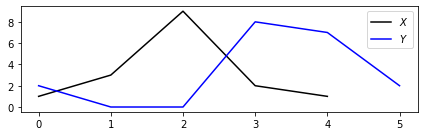

In [1]:
import numpy as np
import scipy.spatial
from numba import jit
import matplotlib.pyplot as plt
%matplotlib inline

X =  [1, 3, 9, 2, 1]
Y = [2, 0, 0, 8, 7, 2]
N = len(X)
M = len(Y)

plt.figure(figsize=(6, 2))
plt.plot(X, c='k', label='$X$')
plt.plot(Y, c='b', label='$Y$')
plt.legend()
plt.tight_layout()

We now compute the **cost matrix** $C$ using the Euclidean distance as **local cost measure** (which amounts to the absolute value in the one-dimensional case).

In [2]:
def compute_cost_matrix(X, Y, metric='euclidean'):
    """Compute the cost matrix of two feature sequences

    Notebook: C3/C3S2_DTWbasic.ipynb

    Args:
        X: Sequence 1
        Y: Sequence 2
        metric: Cost metric, a valid strings for scipy.spatial.distance.cdist

    Returns:
        C: Cost matrix
    """
    X, Y = np.atleast_2d(X, Y)
    C = scipy.spatial.distance.cdist(X.T, Y.T, metric=metric)
    return C

C =  compute_cost_matrix(X, Y, metric='euclidean')
print('Cost matrix C =', C, sep='\n')

Cost matrix C =
[[1. 1. 1. 7. 6. 1.]
 [1. 3. 3. 5. 4. 1.]
 [7. 9. 9. 1. 2. 7.]
 [0. 2. 2. 6. 5. 0.]
 [1. 1. 1. 7. 6. 1.]]


Next, using dynamic programming, we compute the **accumulated cost matrix** $D$,  which yields the **DTW distance** $\mathrm{DTW}(X,Y)$.

In [3]:
@jit(nopython=True)
def compute_accumulated_cost_matrix(C):
    """Compute the accumulated cost matrix given the cost matrix

    Notebook: C3/C3S2_DTWbasic.ipynb

    Args:
        C: cost matrix

    Returns:
        D: Accumulated cost matrix
    """
    N = C.shape[0]
    M = C.shape[1]
    D = np.zeros((N, M))
    D[0, 0] = C[0, 0]
    for n in range(1, N):
        D[n, 0] = D[n-1, 0] + C[n, 0]
    for m in range(1, M):
        D[0, m] = D[0, m-1] + C[0, m]
    for n in range(1, N):
        for m in range(1, M):
            D[n, m] = C[n, m] + min(D[n-1, m], D[n, m-1], D[n-1, m-1])
    return D

D =  compute_accumulated_cost_matrix(C)
print('Accumulated cost matrix D =', D, sep='\n')
print('DTW distance DTW(X, Y) =', D[-1, -1])

Accumulated cost matrix D =
[[ 1.  2.  3. 10. 16. 17.]
 [ 2.  4.  5.  8. 12. 13.]
 [ 9. 11. 13.  6.  8. 15.]
 [ 9. 11. 13. 12. 11.  8.]
 [10. 10. 11. 18. 17.  9.]]
DTW distance DTW(X, Y) = 9.0


Finally, we derive the optimal warping path $P^\ast$ using backtracking.

In [4]:
@jit(nopython=True)
def compute_optimal_warping_path(D):
    """Compute the warping path given an accumulated cost matrix

    Notebook: C3/C3S2_DTWbasic.ipynb

    Args:
        D: Accumulated cost matrix

    Returns
        P: Warping path (list of index pairs)
    """
    N = D.shape[0]
    M = D.shape[1]
    n = N - 1
    m = M - 1
    P = [(n, m)]
    while n > 0 or m > 0:
        if n == 0:
            cell = (0, m - 1)
        elif m == 0:
            cell = (n - 1, 0)
        else:
            val = min(D[n-1, m-1], D[n-1, m], D[n, m-1])
            if val == D[n-1, m-1]:
                cell = (n-1, m-1)
            elif val == D[n-1, m]:
                cell = (n-1, m)
            else:
                cell = (n, m-1)
        P.append(cell)
        (n, m) = cell
    P.reverse()
    return np.array(P)
        
P = compute_optimal_warping_path(D)
print('Optimal warping path P =', P.tolist())

Optimal warping path P = [[0, 0], [0, 1], [1, 2], [2, 3], [2, 4], [3, 5], [4, 5]]


As a sanity check, we now compute the **total cost** of the optimal warping path, which agrees with $\mathrm{DTW}(X,Y)$.

In [5]:
c_P = sum(C[n, m] for (n, m) in P)
print('Total cost of optimal warping path:', c_P)
print('DTW distance DTW(X, Y) =', D[-1, -1])

Total cost of optimal warping path: 9.0
DTW distance DTW(X, Y) = 9.0


Finally, we visualize the cost matrix $C$ and the accumulated cost matrix $D$ along with the optimal warping path (indicated by the red dots).

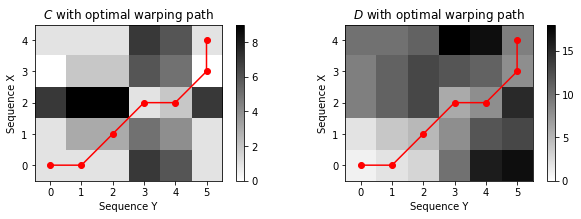

In [6]:
P = np.array(P) 
plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
plt.imshow(C, cmap='gray_r', origin='lower', aspect='equal')
plt.plot(P[:, 1], P[:, 0], marker='o', color='r')
plt.clim([0, np.max(C)])
plt.colorbar()
plt.title('$C$ with optimal warping path')
plt.xlabel('Sequence Y')
plt.ylabel('Sequence X')

plt.subplot(1, 2, 2)
plt.imshow(D, cmap='gray_r', origin='lower', aspect='equal')
plt.plot(P[:, 1], P[:, 0], marker='o', color='r')
plt.clim([0, np.max(D)])
plt.colorbar()
plt.title('$D$ with optimal warping path')
plt.xlabel('Sequence Y')
plt.ylabel('Sequence X')

plt.tight_layout()

## LibFMP Implemetation

Some of the above functions involve nested loops, which are inefficient to compute when using Python. Using the [`jit`-compiler offered by the Python package Numba](../B/B_PythonNumba.html), one finds accelerated versions of these functions as part of the [`LibFMP`-library](../B/B_LibFMP.html). This library also contains functions for visualization. In the following code cell, we call some of these functions:

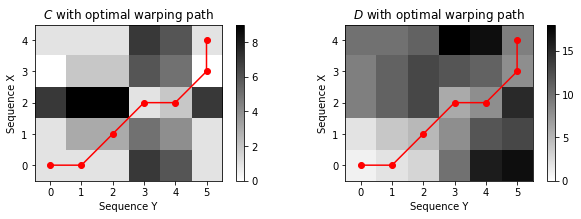

In [7]:
import sys
sys.path.append('..')

import LibFMP.C3

C = LibFMP.C3.compute_cost_matrix(X, Y)
D = LibFMP.C3.compute_accumulated_cost_matrix(C)
P = LibFMP.C3.compute_optimal_warping_path(D)

P = np.array(P)

plt.figure(figsize=(9, 3))
ax = plt.subplot(1, 2, 1)
LibFMP.C3.plot_matrix_with_points(C, P, linestyle='-', 
    ax=[ax], aspect='equal', clim=[0, np.max(C)],
    title='$C$ with optimal warping path', xlabel='Sequence Y', ylabel='Sequence X');

ax = plt.subplot(1, 2, 2)
LibFMP.C3.plot_matrix_with_points(D, P, linestyle='-', 
    ax=[ax], aspect='equal', clim=[0, np.max(D)],
    title='$D$ with optimal warping path', xlabel='Sequence Y', ylabel='Sequence X');

plt.tight_layout()

## LibROSA Implemetation

[LibROSA](https://librosa.github.io/librosa/) also offers a DTW function that can realize different [DTW variants](../C3/C3S2_DTWvariants.html). In the following cell, we show how to call the `librosa`-function for the basic DTW algorithm introduced above. Note that the cost matrix $C$ is computed inside the function `librosa.sequence.dtw` and is not returned. For plotting purposes, we reuse the cost matrix from above. As an alternative, one can first compute the cost matrix outside `librosa.sequence.dtw` and then input this matrix to the function (instead of the sequences $X$ and $Y$).

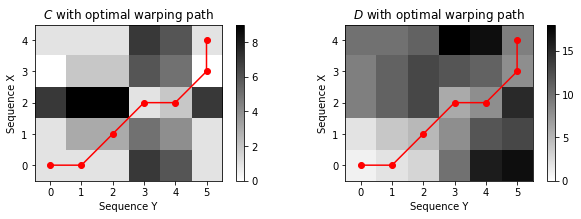

In [8]:
import librosa

D, P = librosa.sequence.dtw(X, Y, metric='euclidean', 
                            step_sizes_sigma=np.array([[1, 1], [0, 1], [1, 0]]),
                            weights_add=np.array([0, 0, 0]), weights_mul=np.array([1, 1, 1]))

plt.figure(figsize=(9, 3))
ax = plt.subplot(1, 2, 1)
LibFMP.C3.plot_matrix_with_points(C, P, linestyle='-', 
    ax=[ax], aspect='equal', clim=[0, np.max(C)],
    title='$C$ with optimal warping path', xlabel='Sequence Y', ylabel='Sequence X');

ax = plt.subplot(1, 2, 2)
LibFMP.C3.plot_matrix_with_points(D, P, linestyle='-', 
    ax=[ax], aspect='equal', clim=[0, np.max(D)],
    title='$D$ with optimal warping path', xlabel='Sequence Y', ylabel='Sequence X');

plt.tight_layout()

## Further Notes

* In the [FMP notebook an DTW variants](../C3/C3S2_DTWvariants.html) we discuss various modifications to speed up DTW computations as well as to better control the overall course of the warping paths.
* We represent in the [FMP notebook on music synchronization](../C3/C3_MusicSynchronization.html) an example application, where we apply DTW for automatically aligning to different recordings of the same piece of music.
* In the FMP notebooks, we discuss many more alignment algorithms related to DTW. All these algorithms are based on dynamics programming (DP). For example:  
    * In the context of [chord recognition](../C5/C5.html), we study the [Viterbi Algorithm](../C5/C5S3_Viterbi.html) for finding an optimal chord sequence. 
    * In the context of [audio retrieval](../C7/C7.html), we introduce [Subsequence DTW](../C7/C7S2_SubsequenceDTW.html), which is a local variant of DTW.
    * In the context of [music structure analysis](../C4/C4.html), introduce a DP-based algorithm for computing an [audio thumbnail](../C4/C4S3_AudioThumbnailing.html)&mdash;the most representative and descriptive section of a music recording. 


<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a>.
</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>